## An Exploratory Data Analysis On The 120 Years Of Summer Olympic History (1896 - 2016)

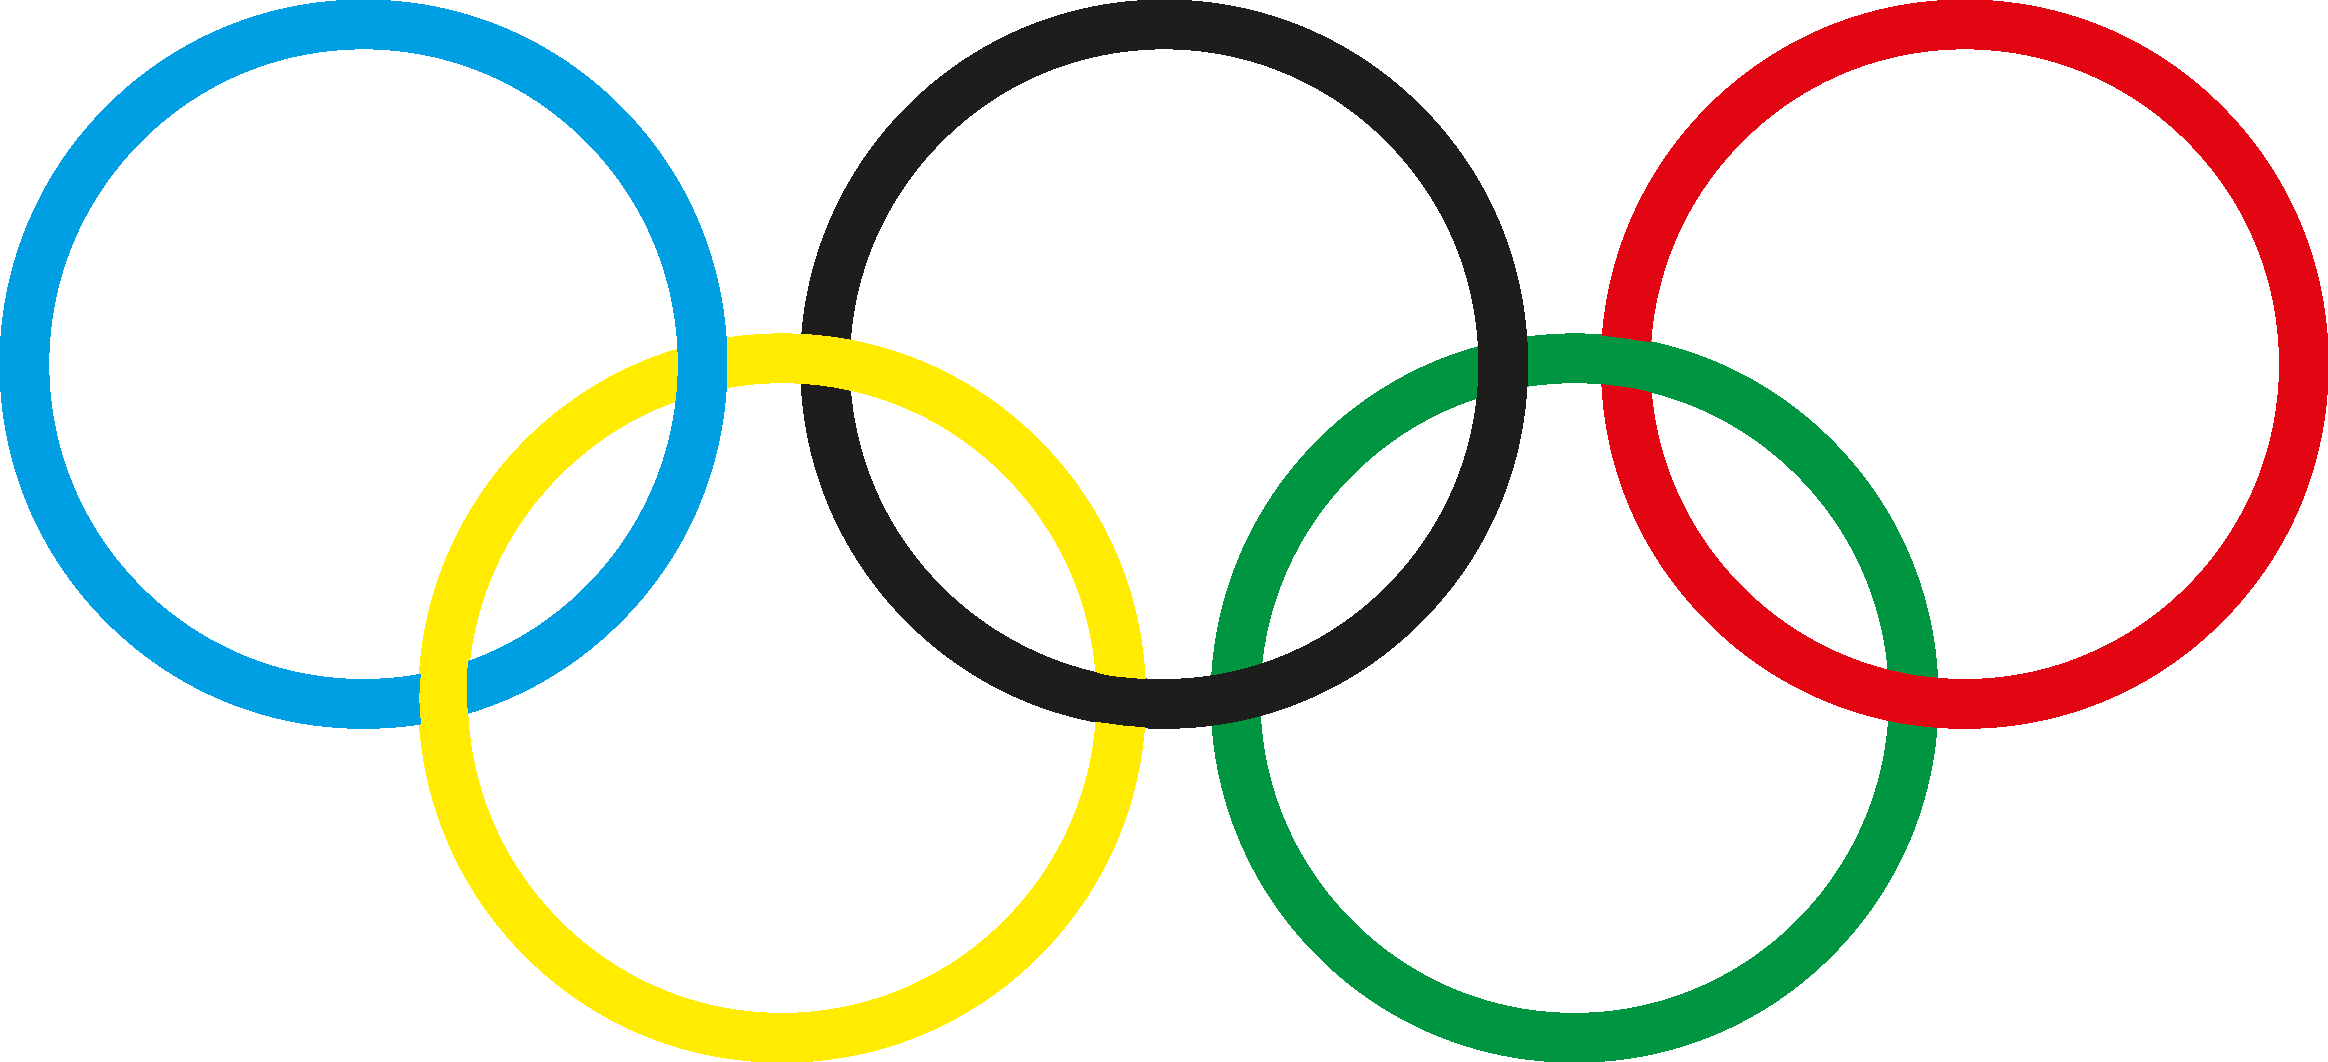

In [2]:
from IPython.display import Image
Image(r"C:\Users\USER\Pictures\Olympic_Logo.png")

# Importing the Necessary Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

# Importing The Datasets

In [3]:
athletes = pd.read_csv(r'C:\Users\USER\Documents\Dataset\athlete_events.csv')
regions = pd.read_csv(r'C:\Users\USER\Documents\Dataset\ioc_regions.csv')

# Reviewing The athletes dataset

In [4]:
athletes.head(5)     # The first five columns in our dataset

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Column names

In [5]:
print('The dataframe comprises of the following column names:\n')
for column in athletes.columns:
    print(column)

The dataframe comprises of the following column names:

ID
Name
Sex
Age
Height
Weight
Team
NOC
Games
Year
Season
City
Sport
Event
Medal


### Number of Rows and Columns

In [6]:
(f'The dataframe has {athletes.shape[0]} number of rows and {athletes.shape[1]} number of columns')

'The dataframe has 271116 number of rows and 15 number of columns'

### Detailed Information on the dataframe

In [7]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### Deleting the ID column

In [8]:
#The ID column seems to function the same way as our Index so we have to delete the ID column'

print('... Deleting the ID column now')
del athletes['ID']

... Deleting the ID column now


In [9]:
print('...confirming that the ID column has been successfully Deleted')

athletes.head(2)

...confirming that the ID column has been successfully Deleted


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


### Checking for duplicate rows 

In [10]:
duplicate = athletes.duplicated().sum()

if duplicate == 0:
    print('There are no duplicate rows in our dataframe')
else:
    print(f'There are exactly {duplicate} duplicate rows in our dataframe, and to gain an accurate insight into our dataframe they all have to be deleted from our dataset.')

There are exactly 1385 duplicate rows in our dataframe, and to gain an accurate insight into our dataframe they all have to be deleted from our dataset.


### Dropping the duplicate rows

In [11]:
athletes.drop_duplicates(inplace = True)

### Confirming all duplicated rows has been dropped

In [12]:
duplicate = athletes.duplicated().sum()

if duplicate == 0:
    print('There are no duplicate rows in our dataframe')
else:
    print(f'There are exactly {duplicate} duplicated rows in our dataframe.')

There are no duplicate rows in our dataframe


###  Columns with Null values in our dataframe

In [13]:
athletes.isnull().sum()[athletes.isnull().sum() > 0]


Age         9315
Height     58814
Weight     61527
Medal     229959
dtype: int64

# Reviewing The regions dataset

In [14]:
regions.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


## Number of Rows and Columns

In [15]:
(f'The dataframe has {regions.shape[0]} number of rows and {regions.shape[1]} number of columns')

'The dataframe has 227 number of rows and 2 number of columns'

In [16]:
regions.isnull().sum()

NOC        0
Country    0
dtype: int64

# Merging both Dataframes together

In [17]:
olympics = pd.merge(athletes,regions, on='NOC',  how='left')
olympics

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269726,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland
269727,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland
269728,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland
269729,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland


## Filtering Only The Summer Olympics Data From Our Dataframe

We would be carrying out analysis of the Summer Olympics only. So, we would be filtering only data related to the Summer olympics

In [18]:
summer = olympics[olympics['Season'] == 'Summer']
summer

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269721,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina
269722,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,United States
269723,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia
269724,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia


## Years that the  summer olympic games has been held

In [19]:
years = summer.sort_values(by = 'Year')


for year in years['Year'].unique():
    print(year)

1896
1900
1904
1906
1908
1912
1920
1924
1928
1932
1936
1948
1952
1956
1960
1964
1968
1972
1976
1980
1984
1988
1992
1996
2000
2004
2008
2012
2016


## Number of Games that has been held between 1896-2016

In [20]:
years['Year'].nunique()

29

Official records shows that only 28 olympics have been held within the 120 years period. But our record here shows 29 Olympics.

A brief research into the Olympic games shows that The 1906 Summer Olympics, also called the **1906 Intercalated Games** held in Athens, Greece are not awarded the title of **Olympiad** because they were held between the 3rd and 4th Olympiads

Medals were given to the participants during this game, but the medals are not officially recognised by the International Olympic Committee. 

You can read more about the 1906 Intercalated games [here](https://en.wikipedia.org/wiki/1906_Intercalated_Games#:~:text=Unsourced%20material%20may%20be%20challenged%20and%20removed.%20The,Games%20in%20Athens%22%20by%20the%20International%20Olympic%20Committee.)

## Filtering out the 1906 summer olympic games so we can have a more accurate analysis

In [21]:
summer = summer[summer['Year'] != 1906]  #Filtering out 1906 games
summer

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269721,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina
269722,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,United States
269723,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia
269724,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia


## Rechecking the years that the olympic games has been held

In [22]:
years = summer.sort_values(by = 'Year')


for year in years['Year'].unique():
    print(year)
    
print('\n\n ... We can confirm that 1906 has been excluded.')

1896
1900
1904
1908
1912
1920
1924
1928
1932
1936
1948
1952
1956
1960
1964
1968
1972
1976
1980
1984
1988
1992
1996
2000
2004
2008
2012
2016


 ... We can confirm that 1906 has been excluded.


## Rechecking the number of Games that has been held between 1896-2016

In [23]:
years['Year'].nunique()

28

## Cities that have hosted the Summer Olympics games

In [24]:
summer['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

## Number of Cities that have hosted the Summer Olympics games

In [25]:
summer['City'].nunique()

23

## Cities and the number of times they have hosted the Summer Olympics games

In [26]:
summer.drop_duplicates(subset = ['Games', 'Year', 'City'])['City'].value_counts()

London            3
Paris             2
Athina            2
Stockholm         2
Los Angeles       2
Sydney            1
Atlanta           1
Berlin            1
Amsterdam         1
Tokyo             1
Barcelona         1
Melbourne         1
Helsinki          1
Munich            1
Seoul             1
Rio de Janeiro    1
Moskva            1
St. Louis         1
Montreal          1
Beijing           1
Mexico City       1
Antwerpen         1
Roma              1
Name: City, dtype: int64

The above analysis shows that between 1896 and 2016 **London** has hosted the Olympics **3 times**, followed by **Los Angeles, Stockholm, Athina and Paris** that have all hosted the games **2 times respectively.**

## Countries that have participated in olympics

In [27]:
summer.drop_duplicates(subset = ['Country'])['Country'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'United States', 'Nicaragua', 'Hungary',
       'Nigeria', 'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq',
       'Syria', 'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada',
       'Ireland', 'Australia', 'South Africa', 'Eritrea', 'Tanzania',
       'Jordan', 'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine',
       'Comoros', 'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia',
       'Maldives', 'Ethiopia', 'United Arab Emirates', 'Yemen',
       'Indonesia', 'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan',
       'Tajikistan', 'Japan', 'Republic of Congo', 'Switzerland',
       'Brazil', 'Monaco', 'Israel', 'Uruguay', 'Sweden', 'Sri Lanka',
       'Armenia', 'Ivory Coast', 'Ke

In [28]:
summer.drop_duplicates(subset = ['Country'])['Country'].nunique()

205

## How many countries participated in the first olympics

In [29]:
first_olympic = summer[summer['Year']==1896]
first_olympic.drop_duplicates(subset = ['Country'])['Country'].unique()

array(['Greece', 'United Kingdom', 'Switzerland', 'United States',
       'Germany', 'France', 'Hungary', 'Australia', 'Austria', 'Denmark',
       'Italy', 'Sweden'], dtype=object)

In [30]:
first_olympic.drop_duplicates(subset = ['Country'])['Country'].nunique()

12

# Countries with their total number of medals in olympics

#### Converting our Medal column from a categorical variable to a dummy variable

In [31]:
medals = pd.get_dummies(summer.Medal)
medals

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
26,0,0,0
...,...,...,...
269721,0,0,0
269722,0,0,0
269723,0,0,0
269724,0,0,0


## Concatenating summer dataframe with the medals dataframe

In [32]:
summer_medals = pd.concat([summer, medals], axis = 1)
summer_medals.head(2)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Bronze,Gold,Silver
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,0,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,0,0


### Creating a new column 'Total' which is the sum of the medals

In [33]:
summer_medals['Total'] = summer_medals[['Bronze','Gold','Silver']].sum(axis=1)
summer_medals.head(2)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Bronze,Gold,Silver,Total
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,0,0,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,0,0,0


### Dropping Duplicates for the following columns: 'Team', 'Games', 'Year', 'Medal', 'City', 'Sport', 'Event'

In [34]:
no_team_sport = summer_medals.drop_duplicates(['Team','Games','Year','Medal','City','Sport','Event']) #dropping team sports
no_team_sport

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Bronze,Gold,Silver,Total
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,0,0,0
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,0,0,0
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,0,0,0,0
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,0,1,0,1
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269693,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,0,0,1,1
269695,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,1,0,0,1
269702,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,0,0,0,0
269703,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,0,0,0,0


**Why drop dulicates for certain columns?**

This is done majorly to eliminate medals awarded to members of a team at the olympics. Because if a team wins a medal in the olympics, it represents only one medal for the country and not the number of medals handed over to the team in the olympics.

So, if a football team wins Gold, it represents only one Gold medal won for the country and not all the medals awarded to each member of that team.

in our dataset, medals awarded to every member of the team is included, and to get a more precise analysis of medals won by countries, duplicates for team sports has to be dropped below.

In [35]:
# Creating our country medals dataframe

country_medals = no_team_sport[['Gold', 'Silver', 'Bronze', 'Total']].groupby(no_team_sport['Country']).sum().sort_values('Total', ascending = False)
country_medals.reset_index(inplace = True)

## Country Medals in the Olympics

In [36]:
#Countries with their total medals

country_medals

,Country,Gold,Silver,Bronze,Total
0,United States,1021.0,795.0,700.0,2516
1,Russia,592.0,498.0,487.0,1577
2,Germany,439.0,451.0,486.0,1376
3,United Kingdom,269.0,305.0,291.0,865
4,France,219.0,242.0,270.0,731
...,...,...,...,...,...
200,Gambia,0.0,0.0,0.0,0
201,Papua New Guinea,0.0,0.0,0.0,0
202,Guam,0.0,0.0,0.0,0
203,Palestine,0.0,0.0,0.0,0


## Visualizing our medals table on a geographical map

**importing the ISO-Alpha-3 data. This is a very important information which are international standards with three(3) letters to describe any country on the globe.**

In [37]:
alpha_3 = pd.read_csv(r'C:\Users\USER\Documents\Dataset\country_codes.csv')
alpha_3.head()

,Country,alpha-3
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND


In [38]:
# Merging our country medals dataframe with theISO-Alpha-3 data

country_map = country_medals.merge(alpha_3, how='left',on='Country')  #Merging our country_medals with alpha_3
country_map 

,Country,Gold,Silver,Bronze,Total,alpha-3
0,United States,1021.0,795.0,700.0,2516,USA
1,Russia,592.0,498.0,487.0,1577,RUS
2,Germany,439.0,451.0,486.0,1376,DEU
3,United Kingdom,269.0,305.0,291.0,865,GBR
4,France,219.0,242.0,270.0,731,FRA
...,...,...,...,...,...,...
200,Gambia,0.0,0.0,0.0,0,GMB
201,Papua New Guinea,0.0,0.0,0.0,0,PNG
202,Guam,0.0,0.0,0.0,0,GUM
203,Palestine,0.0,0.0,0.0,0,PSE


### Map Visualization

In [45]:
medal_columns = ["Total","Gold", "Silver", "Bronze"]
# we need to add this to select which trace 
# is going to be visible
visible = np.array(medal_columns)

# define traces and buttons at once
traces = []
buttons = []
for value in medal_columns:
    traces.append(go.Choropleth(
       locations=country_map['alpha-3'], # Spatial coordinates
        z=country_map[value].astype(float), # Data to be color-coded
        colorbar_title=value,
        colorscale = 'inferno',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
        visible= True if value==medal_columns[0] else False))
    
    

    buttons.append(dict(label=value,
                        method="update",
                        args=[{"visible":list(visible==value)},
                              {"title":f"<b>{value}</b>"}]))

updatemenus = [{"active":0,
                "buttons":buttons,
               }]


# Show figure
fig = go.Figure(data=traces,
                layout=dict(updatemenus=updatemenus))
# This is in order to get the first title displayed correctly
first_title = medal_columns[0]
fig.update_layout(
    width=1000,
    height=620,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={
        'text': '<b>Medals Won By Countries</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=26,
    font=dict(
        family='Heebo', 
        size=18, 
        color='#525252'
    ),
    annotations = [dict(
        x=0.5,
        y=0.1,
        xref='paper',
        yref='paper',
        text='',
        showarrow = False
    )]
);

In [48]:
iplot(fig)

## Top 10 Countries with the highest number of total medals

In [40]:
top_medals = country_medals.head(10)
top_medals=top_medals[['Country','Gold','Silver','Bronze']]
top_medals

,Country,Gold,Silver,Bronze
0,United States,1021.0,795.0,700.0
1,Russia,592.0,498.0,487.0
2,Germany,439.0,451.0,486.0
3,United Kingdom,269.0,305.0,291.0
4,France,219.0,242.0,270.0
5,Italy,212.0,185.0,195.0
6,China,228.0,163.0,154.0
7,Australia,149.0,171.0,194.0
8,Sweden,147.0,170.0,181.0
9,Hungary,176.0,149.0,169.0


In [41]:
colours = {'Gold':'#FFDF00', 'Silver':'#D3D3D3', 'Bronze':'#CD7532'}

a = px.bar(top_medals,x='Country', y=['Gold','Silver','Bronze'], color_discrete_map = colours, barmode = 'group', template='none')



a.update_layout(
    width=1000,
    height=750,
    
    title={
        'text': '<b>Top 10 Countries Olympic Medal</b>',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    title_font_color='#525252',
    title_font_size=26,
    font=dict(
        family='Heebo', 
        size=13, 
        color='#525252'
    ),
    annotations = [dict(
        x=0.5,
        y=0.1,
        xref='paper',
        yref='paper',
        text='',
        showarrow = False
    )],
    margin_pad = 10
)


a.update_xaxes(tickangle=90,
              title_text=' ',
              title_font={'size':10},
              visible=True, showticklabels=True, 
                showgrid = False)

a.update_yaxes(title_text='No. of medals',
              title_font={'size':10},
              showgrid = False)

## Top 10 Countries with most medals at a single Olympic

In [44]:
most_medals = no_team_sport['Total'].groupby([no_team_sport.Country,
                                              no_team_sport.Year]).sum().sort_values(ascending = False).head(10)
most_medals.reset_index()

,Country,Year,Total
0,United States,1904,230
1,Russia,1980,195
2,United States,1984,173
3,United Kingdom,1908,145
4,Germany,1988,142
5,Russia,1988,131
6,Germany,1976,129
7,Germany,1980,126
8,Russia,1976,125
9,United States,2016,121


### Top 10 Countries with the most Gold medals at a single Olympic

In [45]:
most_gold = no_team_sport['Gold'].groupby([no_team_sport.Country,
                                           no_team_sport.Year]).sum().sort_values(ascending = False).head(10)
most_gold.reset_index()

,Country,Year,Gold
0,United States,1984,82
1,Russia,1980,80
2,United States,1904,76
3,United Kingdom,1908,56
4,Russia,1988,54
5,China,2008,51
6,Germany,1976,50
7,Russia,1972,50
8,Russia,1976,49
9,Germany,1988,48


## Oldest competitor  in the olympics

In [46]:
summer[summer['Age'] == summer['Age'].max()]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
255752,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,United States


John Quincy Adams Ward(1830-1910),  was a sculptor prominent for his larger than life statue of George Washington. 
Quincy's sculpure, **Indian Hunter with his Dog**, was submitted  posthumously to the 1928 olympics in Amsterdam under **Art competions.** So, he wasn't exactly 97 years Old. He was dead, but he would have been 97 if he was to be alive. 

The Art Competions formed part of modern olympics from 1912 to 1948.

Art Competions are no longer considered today as Olympic events, as it were abandoned in **1954** because artists were considered to be professionals, while olympic athletes were considered to be amateurs, see [Wikipedia for more info](https://en.wikipedia.org/wiki/Art_competitions_at_the_Summer_Olympics)

### Excluding Art Competions from our dataframe to get the oldest competitor

In [47]:
no_art = summer_medals[summer_medals['Sport'] != 'Art Competitions'] #Excluding art competitions
no_art[no_art['Age'] == no_art['Age'].max() ].drop_duplicates(['Name'])

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Bronze,Gold,Silver,Total
232184,Oscar Gomer Swahn,M,72.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Single Shot",NaN,Sweden,0,0,0,0
253182,Arthur von Pongracz de Szent-Mikls und vr,M,72.0,NaN,NaN,Austria,AUT,1936 Summer,1936,Summer,Berlin,Equestrianism,"Equestrianism Men's Dressage, Individual",NaN,Austria,0,0,0,0


From the above we can see that Two individuals are the oldest people to have participated in the Olympics with the Age of **72** respectively.

## Oldest olympic medalist

In [48]:
old = summer_medals[(summer_medals['Total'] >= 1)]
old[old['Age'] == old['Age'].max()]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Bronze,Gold,Silver,Total
44366,John (Herbert Crawford-) Copley (Williamson-),M,73.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",Silver,United Kingdom,0,0,1,1


**Copley** is considered to be the oldest person to have won an olypic medal, that's if we are to consider Art Competitions in our dataframe.

### Excluding Art Competions from our dataframe to get the oldest olympic medalist

In [49]:
old = no_art[no_art['Total'] >= 1]
old[old['Age'] == old['Age'].max()]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Bronze,Gold,Silver,Total
232186,Oscar Gomer Swahn,M,72.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Double Shot, Team",Silver,Sweden,0,0,1,1


The oldest olympic medalist from a sporting event aside **Art Competitions** happens to be **Oscar Gomer Swahn**, who won silver at the **Shooting Sport** during the 1920 Olympics in Antwerpen.

**Please note, I filtered out the Art Competitions from the data**

## Youngest competitor in the olympics

In [50]:
summer[summer['Age'] == summer['Age'].min()]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
142104,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,Greece


## Youngest olympic medalist

In [51]:
summer_medals[(summer_medals['Age'] == summer_medals['Age'].min()) & (summer_medals['Total'] >= 1)]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Bronze,Gold,Silver,Total
142104,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,Greece,1,0,0,1


**Dimitrios Loundras** of  Greece is the youngest competitor in the olympics and also the youngest medalist. He won a Bronze medal at 1896 Summer Games held in Greece and he was only **10 years old.**

## Participants with the highest number of olympic appearance

In [52]:
summer.drop_duplicates(['Name','Games','Year','City'])['Name'].value_counts().head(12)

Ian Millar                         10
Hubert Raudaschl                    9
Afanasijs Kuzmins                   9
Francisco Boza Dibos                8
Nino Salukvadze (-Machavariani)     8
Lesley Allison Thompson-Willie      8
Josefa Idem-Guerrini                8
Piero D'Inzeo                       8
Paul Bert Elvstrm                   8
Durward Randolph Knowles            8
Rajmond Debevec                     8
Raimondo D'Inzeo                    8
Name: Name, dtype: int64

From the data generated above we can see that **Ian Millar** has the highest number of olympic appearance.
Below we would be looking into **Ian Millar** data, to ascertain the olympic games he participated in, his country and also his olympic medals(if he won any).

In [53]:
Ian = summer_medals[summer_medals['Name'] == 'Ian Millar'] # Filtering out Ian Millar's data

###  Ian Millar Olympic Brief Bio. Derived From Our Dataframe

In [54]:
print(f'Ian Millar participated in {Ian.Year.nunique()} Olympic Games.')
print(f'\nHis first game was in {Ian.Year.unique()[0]} in the city of {Ian.City.unique()[0]}, at the age of {int(Ian.Age.unique()[0])}.')
print(f'\nMillar comes from {Ian.Country.unique()[0]} and represented his country in the sport of {Ian.Sport.unique()[0]}.')
print(f'\nHe contested in {Ian.Event.nunique()} events in his sport through his 10  olympic games and the events are: {Ian.Event.unique()[0]} and {Ian.Event.unique()[1]}.')
print(f'\nHe won only {Ian.Total.sum()} {Ian.Medal.unique()[1]} Medal at the Olympic games.')
print(f'\nHis first and only Medal came at the {Ian.Year.unique()[8]} olympic games in {Ian.City.unique()[8]}, at the age of {int(Ian.Age.unique()[8])}.') 
print(f'\nMillar last olympics on record was the {Ian.Year.unique()[9]} olympic games in {Ian.City.unique()[9]}, at the age of {int(Ian.Age.unique()[9])}.')
print(f'\nSo, overall Millar participated in {Ian.Year.nunique()} Olympic Games. In the following years and cities respectively:')

for year,city in zip(Ian.Year.unique(),Ian.City.unique()):
    print(f'\n{year} Olympic Games, in the City of {city}.')
print(f'\n... Making him the athlete with the highest number of Olympic Games appearances.')

Ian Millar participated in 10 Olympic Games.

His first game was in 1972 in the city of Munich, at the age of 25.

Millar comes from Canada and represented his country in the sport of Equestrianism.

He contested in 2 events in his sport through his 10  olympic games and the events are: Equestrianism Mixed Jumping, Team and Equestrianism Mixed Jumping, Individual.

He won only 1 Silver Medal at the Olympic games.

His first and only Medal came at the 2008 olympic games in Beijing, at the age of 61.

Millar last olympics on record was the 2012 olympic games in London, at the age of 65.

So, overall Millar participated in 10 Olympic Games. In the following years and cities respectively:

1972 Olympic Games, in the City of Munich.

1976 Olympic Games, in the City of Montreal.

1984 Olympic Games, in the City of Los Angeles.

1988 Olympic Games, in the City of Seoul.

1992 Olympic Games, in the City of Barcelona.

1996 Olympic Games, in the City of Atlanta.

2000 Olympic Games, in the City

## Participation of men and women over the years

In [55]:
gender = pd.get_dummies(summer['Sex'])  #Creating dummy variables for our sex column

In [56]:
gender = pd.concat([summer, gender], axis = 1)  #merging the dummy variable with our dataframe
gender.head(3)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,F,M
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,1
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,1
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,0,1


In [57]:
male_female = gender.drop_duplicates(['Name','Sex','NOC','Country','Year','City'])[['M','F']].groupby(gender['Year']).sum()
male_female.reset_index(inplace=True)
male_female.rename(columns={'M':'Male', 'F':'Female'}, inplace=True)
male_female

,Year,Male,Female
0,1896,176.0,0.0
1,1900,1197.0,23.0
2,1904,644.0,6.0
3,1908,1980.0,44.0
4,1912,2356.0,53.0
5,1920,2597.0,78.0
6,1924,3100.0,156.0
7,1928,2934.0,312.0
8,1932,1721.0,201.0
9,1936,4122.0,361.0


**From the above we can see that during the first Modern Olympic Games in 1896, no female athlete competed.**

## Visualizing The Gender Distribution At Each Olympics

In [58]:
sex = px.line(male_female, x = 'Year', y=['Male', 'Female'], template = 'plotly_dark')

sex.update_layout(margin=dict(l=10,
                               r=10,
                               t=50,
                               b=10),
                 title={
        'text': 'Gender Count in Olympics Between (1896 - 2016)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

sex.update_xaxes(visible=True, showticklabels=True, 
                showgrid = False,
                type='category')

sex.update_yaxes(showgrid = False)


From our visualization there have never been an equal representation of both male and female athletes at the olympics.There have always been more male than female athletes at the games.

## Participant with the highest number of medals

In [59]:
participants = summer_medals[['Gold', 'Silver', 'Bronze', 'Total']].groupby([summer.Name,summer.Sport,summer.Country]).sum().sort_values('Total', ascending = False)
participants.reset_index(inplace = True)
participants.head(14)

,Name,Sport,Country,Gold,Silver,Bronze,Total
0,"Michael Fred Phelps, II",Swimming,United States,23,3,2,28
1,Larysa Semenivna Latynina (Diriy-),Gymnastics,Russia,9,5,4,18
2,Nikolay Yefimovich Andrianov,Gymnastics,Russia,7,5,3,15
3,Edoardo Mangiarotti,Fencing,Italy,6,5,2,13
4,Takashi Ono,Gymnastics,Japan,5,4,4,13
5,Borys Anfiyanovych Shakhlin,Gymnastics,Russia,7,4,2,13
6,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming,United States,8,3,1,12
7,Aleksey Yuryevich Nemov,Gymnastics,Russia,4,2,6,12
8,Paavo Johannes Nurmi,Athletics,Finland,9,3,0,12
9,Birgit Fischer-Schmidt,Canoeing,Germany,8,4,0,12


#### Simplifying the names of the olympians for better visualization

In [60]:
f_name = participants['Name'].str.split(' ', n = 2, expand = True)[0]  #Splitting out only the first names of the athletes
simple = participants.copy()    #Making a copy of the particiants dataframe
simple['Name'] = f_name         #Replacing the full names with only the first names
simple.head(14)

,Name,Sport,Country,Gold,Silver,Bronze,Total
0,Michael,Swimming,United States,23,3,2,28
1,Larysa,Gymnastics,Russia,9,5,4,18
2,Nikolay,Gymnastics,Russia,7,5,3,15
3,Edoardo,Fencing,Italy,6,5,2,13
4,Takashi,Gymnastics,Japan,5,4,4,13
5,Borys,Gymnastics,Russia,7,4,2,13
6,Jennifer,Swimming,United States,8,3,1,12
7,Aleksey,Gymnastics,Russia,4,2,6,12
8,Paavo,Athletics,Finland,9,3,0,12
9,Birgit,Canoeing,Germany,8,4,0,12


## Visualizing the highest number of olympic medalists by their countries

In [61]:
olympians = px.bar(simple.head(14), x = 'Name', y=['Total'], template = 'none',
                  color = 'Country', color_continuous_scale=px.colors.sequential.Viridis)

olympians.update_layout( width=1000,
    height=700,
                 title={
        'text': 'Top Medalists in Olympics Between (1896 - 2016)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
margin_pad = 10)

olympians.update_xaxes(visible=True, showticklabels=True,
                showgrid = False,tickangle = 90)

olympians.update_yaxes(showgrid = False)


## sports and events in olympics by year

In [62]:
pd.set_option("display.max_columns", None)   #displaying all columns

In [63]:
sport_event = summer.drop_duplicates(['Event', 'Year']).value_counts(['Year', 'Sport'])
sport_event.unstack()  #unstacking our series to get a dataframe

Sport,Aeronautics,Alpinism,Archery,Art Competitions,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Beach Volleyball,Boxing,Canoeing,Cricket,Croquet,Cycling,Diving,Equestrianism,Fencing,Figure Skating,Football,Golf,Gymnastics,Handball,Hockey,Ice Hockey,Jeu De Paume,Judo,Lacrosse,Modern Pentathlon,Motorboating,Polo,Racquets,Rhythmic Gymnastics,Roque,Rowing,Rugby,Rugby Sevens,Sailing,Shooting,Softball,Swimming,Synchronized Swimming,Table Tennis,Taekwondo,Tennis,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,3.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0
1900,NaN,NaN,8.0,NaN,23.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,3.0,3.0,NaN,5.0,7.0,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,1.0,NaN,8.0,8.0,NaN,7.0,NaN,NaN,NaN,4.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN
1904,NaN,NaN,6.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,7.0,1.0,NaN,5.0,NaN,1.0,2.0,12.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,5.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,1.0,2.0,7.0
1908,NaN,NaN,3.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,6.0,2.0,NaN,4.0,4.0,1.0,NaN,2.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,3.0,1.0,2.0,NaN,NaN,4.0,1.0,NaN,4.0,15.0,NaN,6.0,NaN,NaN,NaN,6.0,NaN,NaN,1.0,NaN,1.0,NaN,9.0
1912,NaN,NaN,NaN,5.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,5.0,5.0,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,18.0,NaN,9.0,NaN,NaN,NaN,8.0,NaN,NaN,1.0,NaN,1.0,NaN,5.0
1920,NaN,NaN,10.0,5.0,29.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,6.0,5.0,7.0,6.0,3.0,1.0,NaN,4.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,5.0,1.0,NaN,10.0,22.0,NaN,10.0,NaN,NaN,NaN,5.0,NaN,NaN,1.0,NaN,1.0,5.0,10.0
1924,NaN,NaN,NaN,5.0,27.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,6.0,5.0,5.0,7.0,NaN,1.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,7.0,1.0,NaN,3.0,10.0,NaN,11.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1.0,5.0,13.0
1928,NaN,NaN,NaN,13.0,27.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,6.0,4.0,6.0,7.0,NaN,1.0,NaN,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,3.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,13.0
1932,NaN,1.0,NaN,13.0,29.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,6.0,4.0,6.0,7.0,NaN,NaN,NaN,11.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,4.0,2.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,14.0


##  A Heatmap for better visualization of the sports and events in olympics by year <a id='sports_events'></a>

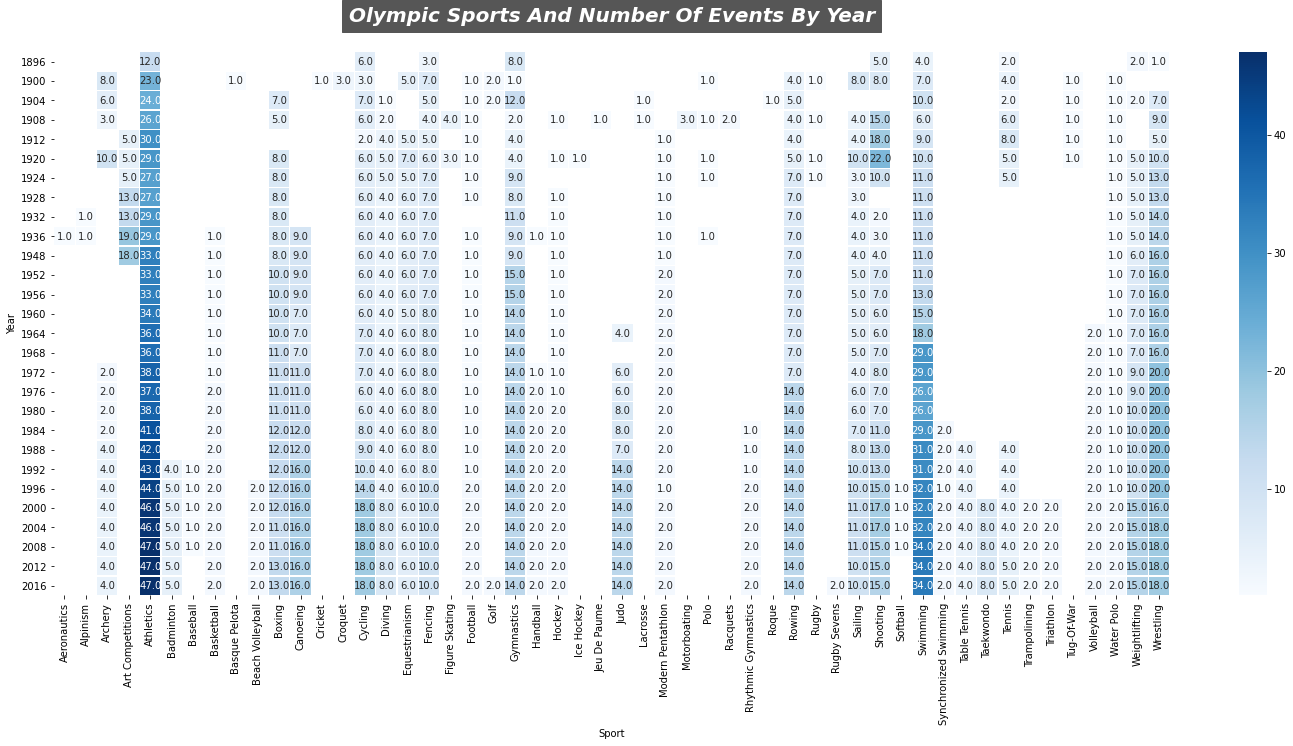

In [64]:
fig,ax = plt.subplots(figsize=(25,10))

title = 'Olympic Sports And Number Of Events By Year'

plt.title(title, backgroundcolor ='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)
          

sns.heatmap(sport_event.unstack(), annot = True, fmt="", cmap = 'Blues', linewidth = 0.30, ax =ax)

plt.show()

With the help of the visualization we can easily see that **Football** was not part of the olympic sport in **1896** and **1932.** And until the 1996 olympic games football had only one event, which was the Men's football. Women's football was added as an official event of the olympic games in **1996 Atlanta games.**



Another important fact we can easily deduce from this visualization, is that the only sports that have never been absent from the olympic games are; **Athletics, Cycling, Fencing, Gymnastics and Swimming.** These are the only sports that have always had events in every olympic games between **1896-2016.**

## Number of sports in olympics by year

In [65]:
sports = pd.DataFrame(summer.drop_duplicates(['Year', 'Sport'])['Year'].value_counts()) #Dropping duplicates by year and sport
sports.reset_index(inplace = True)
sports.rename(columns={'index':'Year', 'Year':'Number of Sports'},inplace = True)  #Renaming of columns
sports = sports.sort_values('Year').reset_index(drop = True)
sports

,Year,Number of Sports
0,1896,9
1,1900,20
2,1904,18
3,1908,24
4,1912,17
5,1920,25
6,1924,20
7,1928,17
8,1932,18
9,1936,24


##  Visualizing the number of sports at every olympics

In [66]:
sport_graph = px.line(sports, x = 'Year', y=['Number of Sports'], template = 'plotly_dark')

sport_graph.update_layout(margin=dict(l=10,
                               r=10,
                               t=50,
                               b=10),
                 title={
        'text': 'Number of sports held in olympics between (1896 - 2016)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

sport_graph.update_xaxes(visible=True, showticklabels=True,
                showgrid = False,
                        type='category')

sport_graph.update_yaxes(showgrid = False)

## Number of events in olympics by year

In [67]:
events = pd.DataFrame(summer.drop_duplicates(['Year', 'Sport', 'Event'])['Year'].value_counts())
events.reset_index(inplace = True)
events.rename(columns={'index':'Year', 'Year':'Number of Events'},inplace = True)
events = events.sort_values('Year').reset_index(drop = True)
events

,Year,Number of Events
0,1896,43
1,1900,90
2,1904,95
3,1908,109
4,1912,107
5,1920,158
6,1924,131
7,1928,122
8,1932,131
9,1936,150


## Visualizing the number of events at every olympics

In [68]:
event_graph = px.line(events, x = 'Year', y=['Number of Events'], template = 'plotly_dark')

event_graph.update_layout(margin=dict(l=10,
                               r=10,
                               t=50,
                               b=10),
                 title={
        'text': 'Number of events held in olympics between (1896 - 2016)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

event_graph.update_xaxes(visible=True, showticklabels=True,
                showgrid = False,
                        type='category')

event_graph.update_yaxes(showgrid = False)

## Number of athletes in olympics by year

In [69]:
athletes = pd.DataFrame(summer.drop_duplicates(['Year', 'Name'])['Year'].value_counts())
athletes.reset_index(inplace = True)
athletes.rename(columns={'index':'Year', 'Year':'Number of athletes'},inplace = True)
athletes = athletes.sort_values('Year').reset_index(drop = True)
athletes

,Year,Number of athletes
0,1896,176
1,1900,1220
2,1904,650
3,1908,2024
4,1912,2409
5,1920,2675
6,1924,3256
7,1928,3246
8,1932,1922
9,1936,4482


## Visualizing the number of athletes at every olympics

In [70]:
athlete_graph = px.line(athletes, x = 'Year', y=['Number of athletes'], template = 'plotly_dark')

athlete_graph.update_layout(margin=dict(l=10,
                               r=10,
                               t=50,
                               b=10),
                 title={
        'text': 'Number Of Athletes in every olympics between (1896 - 2016)',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

athlete_graph.update_xaxes(visible=True, showticklabels=True,
                showgrid = False,
                          type='category')

athlete_graph.update_yaxes(showgrid = False)

#  We would be checking out the top ten most successful athletes in every of the five sports that has always featured in the olympics. You can get an insight into the olympic sports and events [here](#sports_events)

## Top 10 Successful Athletes in Athletics

In [71]:
participants[participants['Sport'] == 'Athletics'].sort_values(['Gold', 'Silver', 'Bronze', 'Total'],
                                                               ascending=False).head(10).reset_index(drop = True)

,Name,Sport,Country,Gold,Silver,Bronze,Total
0,Paavo Johannes Nurmi,Athletics,Finland,9,3,0,12
1,"Frederick Carlton ""Carl"" Lewis",Athletics,United States,9,1,0,10
2,Usain St. Leo Bolt,Athletics,Jamaica,8,0,0,8
3,"Raymond Clarence ""Ray"" Ewry",Athletics,United States,8,0,0,8
4,Allyson Michelle Felix,Athletics,United States,6,3,0,9
5,"Viljo Eino ""Ville"" Ritola (Koukkari-)",Athletics,Finland,5,3,0,8
6,"Johan Pietari ""Hannes"" Kolehmainen",Athletics,Finland,4,1,0,5
7,Emil Ztopek,Athletics,Czech Republic,4,1,0,5
8,Evelyn Ashford (-Washington),Athletics,United States,4,1,0,5
9,"Melvin Winfield ""Mel"" Sheppard",Athletics,United States,4,1,0,5


## Top 10 Successful Athletes in Swimming

In [72]:
participants[participants['Sport'] == 'Swimming'].sort_values(['Gold', 'Silver', 'Bronze', 'Total'],
                                                               ascending=False).head(10).reset_index(drop = True)

,Name,Sport,Country,Gold,Silver,Bronze,Total
0,"Michael Fred Phelps, II",Swimming,United States,23,3,2,28
1,Mark Andrew Spitz,Swimming,United States,9,1,1,11
2,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming,United States,8,3,1,12
3,"Matthew Nicholas ""Matt"" Biondi",Swimming,United States,8,2,1,11
4,"Donald Arthur ""Don"" Schollander",Swimming,United States,7,1,0,8
5,Ryan Steven Lochte,Swimming,United States,6,3,3,12
6,Kristin Otto,Swimming,Germany,6,0,0,6
7,Amy Deloris Van Dyken (-Rouen),Swimming,United States,6,0,0,6
8,"Gary Wayne Hall, Jr.",Swimming,United States,5,3,2,10
9,Ian James Thorpe,Swimming,Australia,5,3,1,9


## Top 10 Successful Athletes in Gymnastics

In [73]:
participants[participants['Sport'] == 'Gymnastics'].sort_values(['Gold', 'Silver', 'Bronze', 'Total'],
                                                               ascending=False).head(10).reset_index(drop = True)

,Name,Sport,Country,Gold,Silver,Bronze,Total
0,Larysa Semenivna Latynina (Diriy-),Gymnastics,Russia,9,5,4,18
1,Sawao Kato,Gymnastics,Japan,8,3,1,12
2,Nikolay Yefimovich Andrianov,Gymnastics,Russia,7,5,3,15
3,Borys Anfiyanovych Shakhlin,Gymnastics,Russia,7,4,2,13
4,Vra slavsk (-Odloilov),Gymnastics,Czech Republic,7,4,0,11
5,Viktor Ivanovych Chukarin,Gymnastics,Russia,7,3,1,11
6,Akinori Nakayama,Gymnastics,Japan,6,2,2,10
7,Vitaly Venediktovich Shcherbo,Gymnastics,Russia,6,0,0,6
8,Takashi Ono,Gymnastics,Japan,5,4,4,13
9,gnes Keleti-Srkny (Klein),Gymnastics,Hungary,5,3,2,10


## Top 10 Successful Athletes in Cycling

In [74]:
participants[participants['Sport'] == 'Cycling'].sort_values(['Gold', 'Silver', 'Bronze', 'Total'],
                                                               ascending=False).head(10).reset_index(drop = True)

,Name,Sport,Country,Gold,Silver,Bronze,Total
0,Jason Francis Kenny,Cycling,United Kingdom,6,1,0,7
1,"Christopher Andrew ""Chris"" Hoy",Cycling,United Kingdom,6,1,0,7
2,Bradley Marc Wiggins,Cycling,United Kingdom,5,1,2,8
3,"Leontine Martha Henrica Petronella ""Leontien"" ...",Cycling,Netherlands,4,1,1,6
4,Marcus Latimer Hurley,Cycling,United States,4,0,1,5
5,Laura Rebecca Trott (-Kenny),Cycling,United Kingdom,4,0,0,4
6,Daniel Yves Morelon,Cycling,France,3,1,1,5
7,Florian Georges Philippe Rousseau,Cycling,France,3,1,0,4
8,Jens Fiedler,Cycling,Germany,3,0,2,5
9,"Edward ""Ed"" Clancy",Cycling,United Kingdom,3,0,1,4


## Top 10 Successful Athletes in Fencing

In [75]:
participants[participants['Sport'] == 'Fencing'].sort_values(['Gold', 'Silver', 'Bronze', 'Total'],
                                                               ascending=False).head(10).reset_index(drop = True)

,Name,Sport,Country,Gold,Silver,Bronze,Total
0,Aladr Gerevich (-Gerei),Fencing,Hungary,7,1,2,10
1,Edoardo Mangiarotti,Fencing,Italy,6,5,2,13
2,Maria Valentina Vezzali,Fencing,Italy,6,1,2,9
3,Pl dm Kovcs,Fencing,Hungary,6,0,1,7
4,Rudolf Krpti,Fencing,Hungary,6,0,0,6
5,Nedo Nadi,Fencing,Italy,6,0,0,6
6,Lucien Alphonse Paul Gaudin,Fencing,France,4,2,0,6
7,Christian Marie Auguste d'Oriola,Fencing,France,4,2,0,6
8,Giuseppe Delfino,Fencing,Italy,4,2,0,6
9,Giovanna Trillini,Fencing,Italy,4,1,3,8


## USA Top 10 Athletes at the Olympics

In [76]:
participants[participants['Country'] == 'United States'].sort_values(['Gold', 'Silver', 'Bronze', 'Total'],
                                                             ascending=False).head(10).reset_index(drop = True)

,Name,Sport,Country,Gold,Silver,Bronze,Total
0,"Michael Fred Phelps, II",Swimming,United States,23,3,2,28
1,Mark Andrew Spitz,Swimming,United States,9,1,1,11
2,"Frederick Carlton ""Carl"" Lewis",Athletics,United States,9,1,0,10
3,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming,United States,8,3,1,12
4,"Matthew Nicholas ""Matt"" Biondi",Swimming,United States,8,2,1,11
5,"Raymond Clarence ""Ray"" Ewry",Athletics,United States,8,0,0,8
6,"Donald Arthur ""Don"" Schollander",Swimming,United States,7,1,0,8
7,Ryan Steven Lochte,Swimming,United States,6,3,3,12
8,Allyson Michelle Felix,Athletics,United States,6,3,0,9
9,Amy Deloris Van Dyken (-Rouen),Swimming,United States,6,0,0,6


## USA performance across various sports at the olympics

In [77]:
team_usa=no_team_sport[no_team_sport.Country == 'United States']   #Filtering out usa athletes from our database

In [78]:
#Grouping all medals won by USA athletes by sports

usa_sport = team_usa[['Gold', 'Silver', 'Bronze', 'Total']].groupby(team_usa.Sport).sum().sort_values('Total', ascending = False)

usa_sport

,Gold,Silver,Bronze,Total
Sport,,,,
Athletics,333.0,256.0,204.0,793
Swimming,245.0,170.0,134.0,549
Diving,48.0,43.0,44.0,135
Wrestling,52.0,42.0,34.0,128
Gymnastics,35.0,42.0,36.0,113
Boxing,50.0,24.0,39.0,113
Shooting,54.0,29.0,27.0,110
Rowing,33.0,32.0,24.0,89
Sailing,19.0,23.0,19.0,61


From the above data derived we can see that the united states who is by far the most successful country in the history of the olympics, has largely dominated several sports at the games, with a total of **793** medals won at **athletics**, **549** medals won at **swimming**, and multiple medal counts won across various events. **But** it is quite a surprising fact, that our data derived is pointing at some various sports where Americans have participated but have never stepped on the podium. 

#### Below are the following sports where the United States have failed to win a medal in their participation

In [79]:
print('Below are the following sports where the United States have failed to win a medal in their participation:')

usa_sport[usa_sport.Total == 0]

Below are the following sports where the United States have failed to win a medal in their participation:


,Gold,Silver,Bronze,Total
Sport,,,,
Table Tennis,0.0,0.0,0.0,0
Rhythmic Gymnastics,0.0,0.0,0.0,0
Trampolining,0.0,0.0,0.0,0
Handball,0.0,0.0,0.0,0
Badminton,0.0,0.0,0.0,0
Rugby Sevens,0.0,0.0,0.0,0


## United Kingdom Top 10 Athletes at the Olympics

In [80]:
participants[participants['Country'] == 'United Kingdom'].sort_values(['Gold', 'Silver', 'Bronze', 'Total'],
                                                               ascending=False).head(10).reset_index(drop = True)

,Name,Sport,Country,Gold,Silver,Bronze,Total
0,Jason Francis Kenny,Cycling,United Kingdom,6,1,0,7
1,"Christopher Andrew ""Chris"" Hoy",Cycling,United Kingdom,6,1,0,7
2,Bradley Marc Wiggins,Cycling,United Kingdom,5,1,2,8
3,"Stephen Geoffrey ""Steven"" Redgrave",Rowing,United Kingdom,5,0,1,6
4,"Charles Benedict ""Ben"" Ainslie",Sailing,United Kingdom,4,1,0,5
5,"Mohamed Muktar Jama ""Mo"" Farah",Athletics,United Kingdom,4,0,0,4
6,Matthew Clive Pinsent,Rowing,United Kingdom,4,0,0,4
7,Laura Rebecca Trott (-Kenny),Cycling,United Kingdom,4,0,0,4
8,Jack Beresford,Rowing,United Kingdom,3,2,0,5
9,Charlotte Susan Jane Dujardin,Equestrianism,United Kingdom,3,1,0,4


## Jamaica Top 10 Athletes at the Olympics

In [81]:
participants[participants['Country'] == 'Jamaica'].sort_values(['Gold', 'Silver', 'Bronze', 'Total'],
                                                               ascending=False).head(10).reset_index(drop = True)

,Name,Sport,Country,Gold,Silver,Bronze,Total
0,Usain St. Leo Bolt,Athletics,Jamaica,8,0,0,8
1,Veronica Angella Campbell-Brown,Athletics,Jamaica,3,3,2,8
2,Shelly-Ann Fraser-Pryce,Athletics,Jamaica,2,3,1,6
3,Yohan Blake,Athletics,Jamaica,2,2,0,4
4,Arthur Stanley Wint,Athletics,Jamaica,2,2,0,4
5,Elaine Thompson,Athletics,Jamaica,2,1,0,3
6,Kemar Bailey-Cole,Athletics,Jamaica,2,0,0,2
7,George Vincent Rhoden,Athletics,Jamaica,2,0,0,2
8,"Herbert Henry ""Herb"" McKenley",Athletics,Jamaica,1,3,0,4
9,"Donald O'Reilly ""Don"" Quarrie",Athletics,Jamaica,1,2,1,4


it's a fact from the data derived that Jamaica's Top 10 medadlists at the olympics all won their medals from a single sport, which is **Athletics.**

<a id='Nigeria_medals'></a>

##  Nigeria medals table 

In [82]:
country_medals[country_medals['Country'] == 'Nigeria']

,Country,Gold,Silver,Bronze,Total
57,Nigeria,3.0,8.0,13.0,24


## When did Nigeria participate in her first Olympic

In [83]:
naija = summer_medals[summer_medals['Country']=='Nigeria']  #filtering out Nigeria data from our dataframe

In [84]:
print(f'\nNigeria Participated in her first Olympic games in the year {naija.Year.unique().min()}.')


Nigeria Participated in her first Olympic games in the year 1952.


## The first Athletes to represent Nigeria at the olympics

In [85]:
first_naija = naija.drop_duplicates(['Name','Year'])[naija.drop_duplicates(['Name', 'Year'])['Year'] == 1956]

first_naija[['Name','Sex','Age','Year','City', 'Sport', 'Medal']].sort_values('Age').reset_index(drop = True)

,Name,Sex,Age,Year,City,Sport,Medal
0,Abdul Karim Ohimai Amu,M,23.0,1956,Melbourne,Athletics,NaN
1,Paul Bamela Engo,M,25.0,1956,Melbourne,Athletics,NaN
2,Rafiu Adio Oluwa,M,25.0,1956,Melbourne,Athletics,NaN
3,Edward Alabi Ajado,M,27.0,1956,Melbourne,Athletics,NaN
4,Julius Obiefuma Chigbolu,M,27.0,1956,Melbourne,Athletics,NaN
5,Peter Esiri,M,28.0,1956,Melbourne,Athletics,NaN
6,Titus Abimbola Erinle,M,29.0,1956,Melbourne,Athletics,NaN
7,Karimu Ayinla Babalola Olowu,M,32.0,1956,Melbourne,Athletics,NaN
8,Vincent Ikechuka Gabriel,M,NaN,1956,Melbourne,Athletics,NaN
9,Thomas Obi,M,NaN,1956,Melbourne,Athletics,NaN


In [86]:
print('A total of 10 Athletes represented Nigeria in her first Olympics and they were all Male, and partcipated only in athletics.')
print(f'\nAt Nigeria\'s first Olympics no medal was won.The minimum age was {int(first_naija.Age.min())}, the maximum  age was {int(first_naija.Age.max())}, With the average age been {int(first_naija.Age.mean())}.')

A total of 10 Athletes represented Nigeria in her first Olympics and they were all Male, and partcipated only in athletics.

At Nigeria's first Olympics no medal was won.The minimum age was 23, the maximum  age was 32, With the average age been 27.


## First  Nigerian to win a medal in olympics

In [87]:
first_medal = naija[naija['Total'] > 0].sort_values('Year').head(1)
first_medal[['Name','Sex','Age','Country','Games','City','Sport','Event','Medal']].reset_index(drop = True)

,Name,Sex,Age,Country,Games,City,Sport,Event,Medal
0,Nojim Maiyegun,M,23.0,Nigeria,1964 Summer,Tokyo,Boxing,Boxing Men's Light-Middleweight,Bronze


##  Nigeria Gold Medalist in olympics

In [88]:
first_gold = naija[naija['Gold'] > 0].sort_values('Year')

first_gold[['Name','Sex','Age','Country','Games','City','Sport','Event','Medal']].reset_index(drop = True)

,Name,Sex,Age,Country,Games,City,Sport,Event,Medal
0,Chioma Ajunwa (-Opara),F,24.0,Nigeria,1996 Summer,Atlanta,Athletics,Athletics Women's Long Jump,Gold
1,Wilson Oruma,M,19.0,Nigeria,1996 Summer,Atlanta,Football,Football Men's Football,Gold
2,Mobi Patrick Oparaku,M,19.0,Nigeria,1996 Summer,Atlanta,Football,Football Men's Football,Gold
3,Sunday Ogorchukwu Oliseh,M,21.0,Nigeria,1996 Summer,Atlanta,Football,Football Men's Football,Gold
4,"Augustine Azuka ""Jay-Jay"" Okocha",M,22.0,Nigeria,1996 Summer,Atlanta,Football,Football Men's Football,Gold
5,Uche Alozie Okechukwu,M,28.0,Nigeria,1996 Summer,Atlanta,Football,Football Men's Football,Gold
6,Abiodun Olugbemiga Obafemi,M,22.0,Nigeria,1996 Summer,Atlanta,Football,Football Men's Football,Gold
7,Garba Lawal,M,22.0,Nigeria,1996 Summer,Atlanta,Football,Football Men's Football,Gold
8,Nwankwo Christian Nwosu Kanu,M,19.0,Nigeria,1996 Summer,Atlanta,Football,Football Men's Football,Gold
9,Victor Nosa Ikpeba,M,23.0,Nigeria,1996 Summer,Atlanta,Football,Football Men's Football,Gold


The above Gold medalist data contradicts the number of Gold Nigeria has won as shown on the [Nigeria medals table](#Nigeria_medals), which is **Three Gold** Medals. This is simply because **two events** Nigeria won Gold medals were actualy team events, and the above data includes every member of the Gold winning team in these two events. These events are **The Men's Football and The Athletics Men's 4 x 400 metres Relay.**

So, From this we can see that only one of Nigeria's Gold medal has come from an individual sport event.

It was **Chioma Ajunwa** who won Nigeria's First and till present only Individual Gold Medal at the Olympics. This feat was achieved at **Atlanta 1996 Olympics** in the **Athletics Women's Long Jump** event.

## Members of the 1996 Olympic Men's Football team

In [89]:
dream_team = naija[(naija['Sport'] == 'Football') & (naija['Medal'] == 'Gold')]
dream_team = dream_team[['Name','Sex','Age']].reset_index(drop = True)
dream_team

,Name,Sex,Age
0,Daniel Owofin Amokachi,M,23.0
1,Emmanuel Amunike,M,25.0
2,Tijani Babangida,M,22.0
3,Celestine Boyd Jonto Hycieth Babayaro,M,17.0
4,Joseph Dosu (Oladosu-),M,23.0
5,Teslim Babatunde Fatusi,M,18.0
6,Victor Nosa Ikpeba,M,23.0
7,Nwankwo Christian Nwosu Kanu,M,19.0
8,Garba Lawal,M,22.0
9,Abiodun Olugbemiga Obafemi,M,22.0


In [90]:
print(f'The Nigerian men\'s football team at the Atlanta 1996 olympics that won the Gold medal comprised of {dream_team["Name"].nunique()} players  as listed above.')
print(f'\nThe youngest player on the team was {dream_team["Name"][3]}, at age {int(dream_team["Age"][3])}')
print(f'\nThe oldest player on the team was {dream_team["Name"][10]}, at age {int(dream_team["Age"][10])}')
print(f'\nThe average age of the team is {int(dream_team["Age"].mean())}, that goes to show that Nigeria was represnted by a very young team.')

The Nigerian men's football team at the Atlanta 1996 olympics that won the Gold medal comprised of 16 players  as listed above.

The youngest player on the team was Celestine Boyd Jonto Hycieth Babayaro, at age 17

The oldest player on the team was Uche Alozie Okechukwu, at age 28

The average age of the team is 21, that goes to show that Nigeria was represnted by a very young team.


## Nigeria Medal Table by year  

In [91]:
medals.groupby(naija.drop_duplicates(['Country','Games','City','Sport','Event','Medal']).Year).sum()

,Bronze,Gold,Silver
Year,,,
1952.0,0,0,0
1956.0,0,0,0
1960.0,0,0,0
1964.0,1,0,0
1968.0,0,0,0
1972.0,1,0,0
1980.0,0,0,0
1984.0,1,0,1
1988.0,0,0,0


## Sport and Events Nigeria has participated in the olympics

In [92]:
naija_sport_event = naija.drop_duplicates(['Event', 'Year']).value_counts(['Year', 'Sport']).unstack()
naija_sport_event

Sport,Athletics,Badminton,Basketball,Boxing,Canoeing,Football,Handball,Judo,Rowing,Swimming,Table Tennis,Taekwondo,Tennis,Weightlifting,Wrestling
Year,,,,,,,,,,,,,,,
1952,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1956,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960,8.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,8.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968,12.0,NaN,NaN,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,18.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,10.0,NaN,NaN,8.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0
1984,10.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0
1988,17.0,NaN,NaN,7.0,NaN,1.0,NaN,3.0,NaN,NaN,4.0,NaN,2.0,4.0,6.0


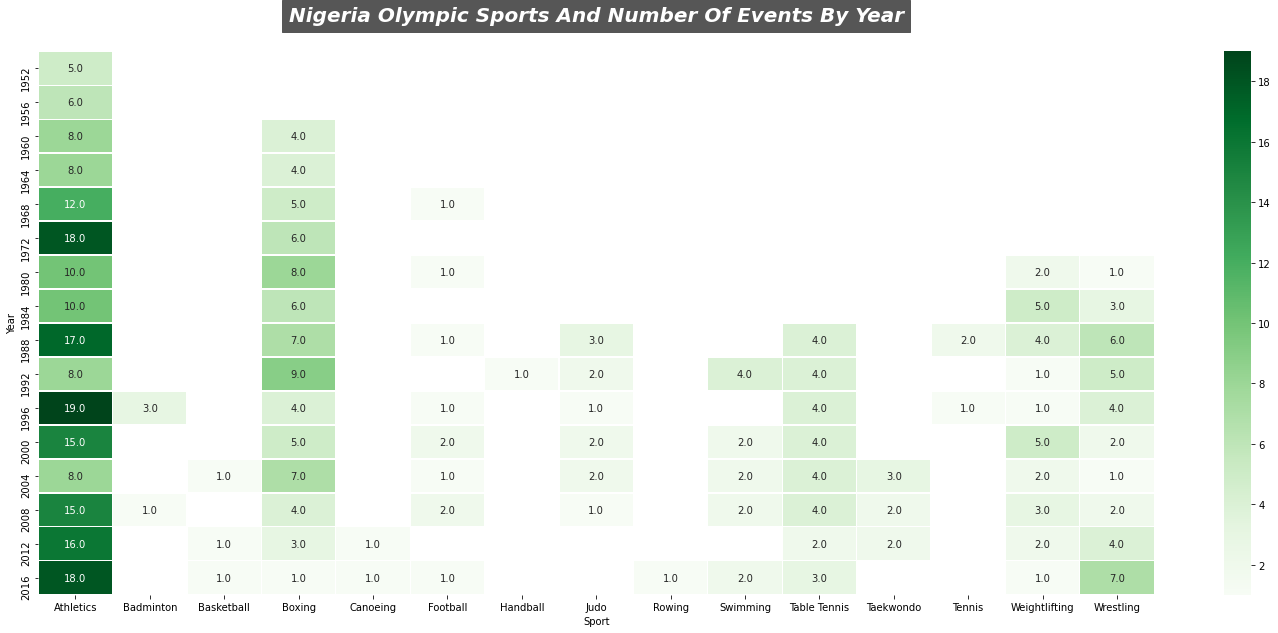

In [93]:
fig,ax = plt.subplots(figsize=(25,10))

title = 'Nigeria Olympic Sports And Number Of Events By Year'

plt.title(title, backgroundcolor ='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)
          

sns.heatmap(naija_sport_event, annot = True, fmt="", cmap = 'Greens', linewidth = 0.30, ax =ax)

plt.show()

The above heatmap shows that **Athletics** is the only sport Nigeria has participated in cosecutively in the Olympic games since her first Olympic game in 1952.
Since we started participating in **Boxing** at the Olympic games in 1960, Never have we participated in only one Boxing event at the Olympics, except for the 2016 olympic games. With the help of the heatmap above we can see the decline of the Nigeria's participation at Boxing events.

## Number of sports Nigeria participates in every olympics

In [94]:
naija_sport = pd.DataFrame(naija.drop_duplicates(['Year', 'Sport'])['Year'].value_counts())
naija_sport.reset_index(inplace = True)
naija_sport.rename(columns={'index':'Year', 'Year':'Number of Sports'},inplace = True)
naija_sport.sort_values('Year').reset_index(drop = True)

,Year,Number of Sports
0,1952,1
1,1956,1
2,1960,2
3,1964,2
4,1968,3
5,1972,2
6,1980,5
7,1984,4
8,1988,8
9,1992,8


## Number of events Nigeria participates in every olympics

In [95]:
naija_events = pd.DataFrame(naija.drop_duplicates(['Year', 'Event'])['Year'].value_counts())
naija_events.reset_index(inplace = True)
naija_events.rename(columns={'index':'Year', 'Year':'Number of Events'},inplace = True)
naija_events.sort_values('Year').reset_index(drop = True)

,Year,Number of Events
0,1952,5
1,1956,6
2,1960,12
3,1964,12
4,1968,18
5,1972,24
6,1980,22
7,1984,24
8,1988,44
9,1992,34


## Number of  Nigeria athletes in every olympics

In [96]:
naija_athletes = pd.DataFrame(naija.drop_duplicates(['Year', 'Name'])['Year'].value_counts())
naija_athletes.reset_index(inplace = True)
naija_athletes.rename(columns={'index':'Year', 'Year':'Number of Athletes'},inplace = True)
naija_athletes = naija_athletes.sort_values('Year').reset_index(drop = True)
naija_athletes

,Year,Number of Athletes
0,1952,9
1,1956,10
2,1960,12
3,1964,18
4,1968,36
5,1972,25
6,1980,44
7,1984,32
8,1988,69
9,1992,55


## Visualizing Number of Nigerian athletes in every olympics

In [97]:
naija_athletes_graph = px.line(naija_athletes, x = 'Year', y=['Number of Athletes'], template = 'plotly_dark')

naija_athletes_graph.update_layout(margin=dict(l=10,
                               r=10,
                               t=50,
                               b=10),
                 title={
        'text': 'Number of Nigerian representatives',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

naija_athletes_graph.update_xaxes(visible=True, showticklabels=True,
                showgrid = False,
                                 type='category')

naija_athletes_graph.update_yaxes(showgrid = False)

It was in the year **2000** Nigeria had the highest number of athletes at the olympics

## Gender representation of Nigerian athletes at the Olympics

In [98]:
naija_gender = gender[gender['Country']=='Nigeria']

In [99]:
naija_genders = naija_gender.drop_duplicates(['Name','Sex','NOC','Country','Year','City'])[['M','F']].groupby(naija_gender.Year).sum()
naija_genders.reset_index(inplace=True)
naija_genders.rename(columns={'M':'Male', 'F':'Female'}, inplace=True)
naija_genders

,Year,Male,Female
0,1952,9,0
1,1956,10,0
2,1960,12,0
3,1964,16,2
4,1968,31,5
5,1972,20,5
6,1980,38,6
7,1984,30,2
8,1988,61,8
9,1992,32,23


## Visualizing the gender representation of Nigerian athletes at the Olympics

In [100]:
naija_genders_graph = px.line(naija_genders, x = 'Year', y=['Male', 'Female'], template = 'plotly_dark')

naija_genders_graph.update_layout(margin=dict(l=10,
                               r=10,
                               t=50,
                               b=10),
                 title={
        'text': 'Gender Count Of Nigerian Athletes in Olympics',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

naija_genders_graph.update_xaxes(visible=True, showticklabels=True,
                showgrid = False,
                                type='category')

naija_genders_graph.update_yaxes(showgrid = False)


From the data and visualization derived we can see that Nigeria did **not** have her first female athlete at the Olympics, until her **fourth** games in 1964,

and,

In 2004, for the first time Nigeria had more female representatives, compared to their male counterparts at the olympics,

and also,

In 2008, there was an equal presence of both male and female representatives at the olympics.

## The Year, Sport and Event NIgeria won her Medals

In [101]:
naija_medalists = naija[naija.Total>0]

In [102]:
b = naija_medalists.drop_duplicates(['Country','Games','City','Sport','Event','Medal'])

In [103]:
medals.groupby([b.Year, b.Sport, b.Event]).sum()

Bronze  Gold  \
Year   Sport         Event                                                  
1964.0 Boxing        Boxing Men's Light-Middleweight              1     0   
1972.0 Boxing        Boxing Men's Light-Heavyweight               1     0   
1984.0 Athletics     Athletics Men's 4 x 400 metres Relay         1     0   
       Boxing        Boxing Men's Featherweight                   0     0   
1992.0 Athletics     Athletics Men's 4 x 100 metres Relay         0     0   
                     Athletics Women's 4 x 100 metres Relay       1     0   
       Boxing        Boxing Men's Heavyweight                     0     0   
                     Boxing Men's Super-Heavyweight               0     0   
1996.0 Athletics     Athletics Women's 200 metres                 1     0   
                     Athletics Women's 4 x 400 metres Relay       0     0   
                     Athletics Women's 400 metres                 1     0   
                     Athletics Women's Long Jump                  0     1   
       Boxing        Boxing Men's Super-Heavyweight               1     0   
       Football      Football Men's Football                      0     1   
2000.0 Athletics     Athletics Men's 4 x 400 metres Relay         0     1   
                     Athletics Women's 100 metres Hurdles         0     0   
       Weightlifting Weightlifting Women's Heavyweight            0     0   
2004.0 Athletics     Athletics Men's 4 x 100 metres Relay         1     0   
                     Athletics Men's 4 x 400 metres Relay         1     0   
2008.0 Athletics     Athletics Women's 4 x 100 metres Relay       1     0   
                     Athletics Women's Long Jump                  1     0   
       Football      Football Men's Football                      0     0   
       Taekwondo     Taekwondo Men's Heavyweight                  1     0   
2016.0 Football      Football Men's Football                      1     0   

                                                             Silver  
Year   Sport         Event                                           
1964.0 Boxing        Boxing Men's Light-Middleweight              0  
1972.0 Boxing        Boxing Men's Light-Heavyweight               0  
1984.0 Athletics     Athletics Men's 4 x 400 metres Relay         0  
       Boxing        Boxing Men's Featherweight                   1  
1992.0 Athletics     Athletics Men's 4 x 100 metres Relay         1  
                     Athletics Women's 4 x 100 metres Relay       0  
       Boxing        Boxing Men's Heavyweight                     1  
                     Boxing Men's Super-Heavyweight               1  
1996.0 Athletics     Athletics Women's 200 metres                 0  
                     Athletics Women's 4 x 400 metres Relay       1  
                     Athletics Women's 400 metres                 0  
                     Athletics Women's Long Jump                  0  
       Boxing        Boxing Men's Super-Heavyweight               0  
       Football      Football Men's Football                      0  
2000.0 Athletics     Athletics Men's 4 x 400 metres Relay         0  
                     Athletics Women's 100 metres Hurdles         1  
       Weightlifting Weightlifting Women's Heavyweight            1  
2004.0 Athletics     Athletics Men's 4 x 100 metres Relay         0  
                     Athletics Men's 4 x 400 metres Relay         0  
2008.0 Athletics     Athletics Women's 4 x 100 metres Relay       0  
                     Athletics Women's Long Jump                  0  
       Football      Football Men's Football                      1  
       Taekwondo     Taekwondo Men's Heavyweight                  0  
2016.0 Football      Football Men's Football                      0